In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
path = "./data/Vaccinations/vacsi-fra-2021-02-03-20h15.csv"
totalVacFraDf = spark.read.format('csv').options(header=True, inferSchema=True).load(path)

In [3]:
totalVacFraDf.printSchema()

root
 |-- fra: string (nullable = true)
 |-- jour: string (nullable = true)
 |-- n_dose1: integer (nullable = true)
 |-- n_cum_dose1: integer (nullable = true)



In [4]:
totalVacFraDf.take(100)

[Row(fra='FR', jour='2020-12-27', n_dose1=13, n_cum_dose1=13),
 Row(fra='FR', jour='2020-12-28', n_dose1=39, n_cum_dose1=52),
 Row(fra='FR', jour='2020-12-29', n_dose1=95, n_cum_dose1=147),
 Row(fra='FR', jour='2020-12-30', n_dose1=103, n_cum_dose1=250),
 Row(fra='FR', jour='2020-12-31', n_dose1=79, n_cum_dose1=329),
 Row(fra='FR', jour='2021-01-01', n_dose1=27, n_cum_dose1=356),
 Row(fra='FR', jour='2021-01-02', n_dose1=54, n_cum_dose1=410),
 Row(fra='FR', jour='2021-01-03', n_dose1=75, n_cum_dose1=485),
 Row(fra='FR', jour='2021-01-04', n_dose1=1369, n_cum_dose1=1854),
 Row(fra='FR', jour='2021-01-05', n_dose1=5009, n_cum_dose1=6863),
 Row(fra='FR', jour='2021-01-06', n_dose1=10428, n_cum_dose1=17291),
 Row(fra='FR', jour='2021-01-07', n_dose1=26448, n_cum_dose1=43739),
 Row(fra='FR', jour='2021-01-08', n_dose1=33256, n_cum_dose1=76995),
 Row(fra='FR', jour='2021-01-09', n_dose1=10498, n_cum_dose1=87493),
 Row(fra='FR', jour='2021-01-10', n_dose1=5321, n_cum_dose1=92814),
 Row(fra='F

In [5]:
newTotalVacFraDf = totalVacFraDf.select(['jour', 'n_dose1', 'n_cum_dose1'])

In [6]:
newTotalVacFraDf.take(100)

[Row(jour='2020-12-27', n_dose1=13, n_cum_dose1=13),
 Row(jour='2020-12-28', n_dose1=39, n_cum_dose1=52),
 Row(jour='2020-12-29', n_dose1=95, n_cum_dose1=147),
 Row(jour='2020-12-30', n_dose1=103, n_cum_dose1=250),
 Row(jour='2020-12-31', n_dose1=79, n_cum_dose1=329),
 Row(jour='2021-01-01', n_dose1=27, n_cum_dose1=356),
 Row(jour='2021-01-02', n_dose1=54, n_cum_dose1=410),
 Row(jour='2021-01-03', n_dose1=75, n_cum_dose1=485),
 Row(jour='2021-01-04', n_dose1=1369, n_cum_dose1=1854),
 Row(jour='2021-01-05', n_dose1=5009, n_cum_dose1=6863),
 Row(jour='2021-01-06', n_dose1=10428, n_cum_dose1=17291),
 Row(jour='2021-01-07', n_dose1=26448, n_cum_dose1=43739),
 Row(jour='2021-01-08', n_dose1=33256, n_cum_dose1=76995),
 Row(jour='2021-01-09', n_dose1=10498, n_cum_dose1=87493),
 Row(jour='2021-01-10', n_dose1=5321, n_cum_dose1=92814),
 Row(jour='2021-01-11', n_dose1=34721, n_cum_dose1=127535),
 Row(jour='2021-01-12', n_dose1=54824, n_cum_dose1=182359),
 Row(jour='2021-01-13', n_dose1=57311, n_

In [7]:
x = newTotalVacFraDf.select('jour').rdd.map(lambda row : row[0]).collect()
y = newTotalVacFraDf.select('n_cum_dose1').rdd.map(lambda row : row[0]).collect()

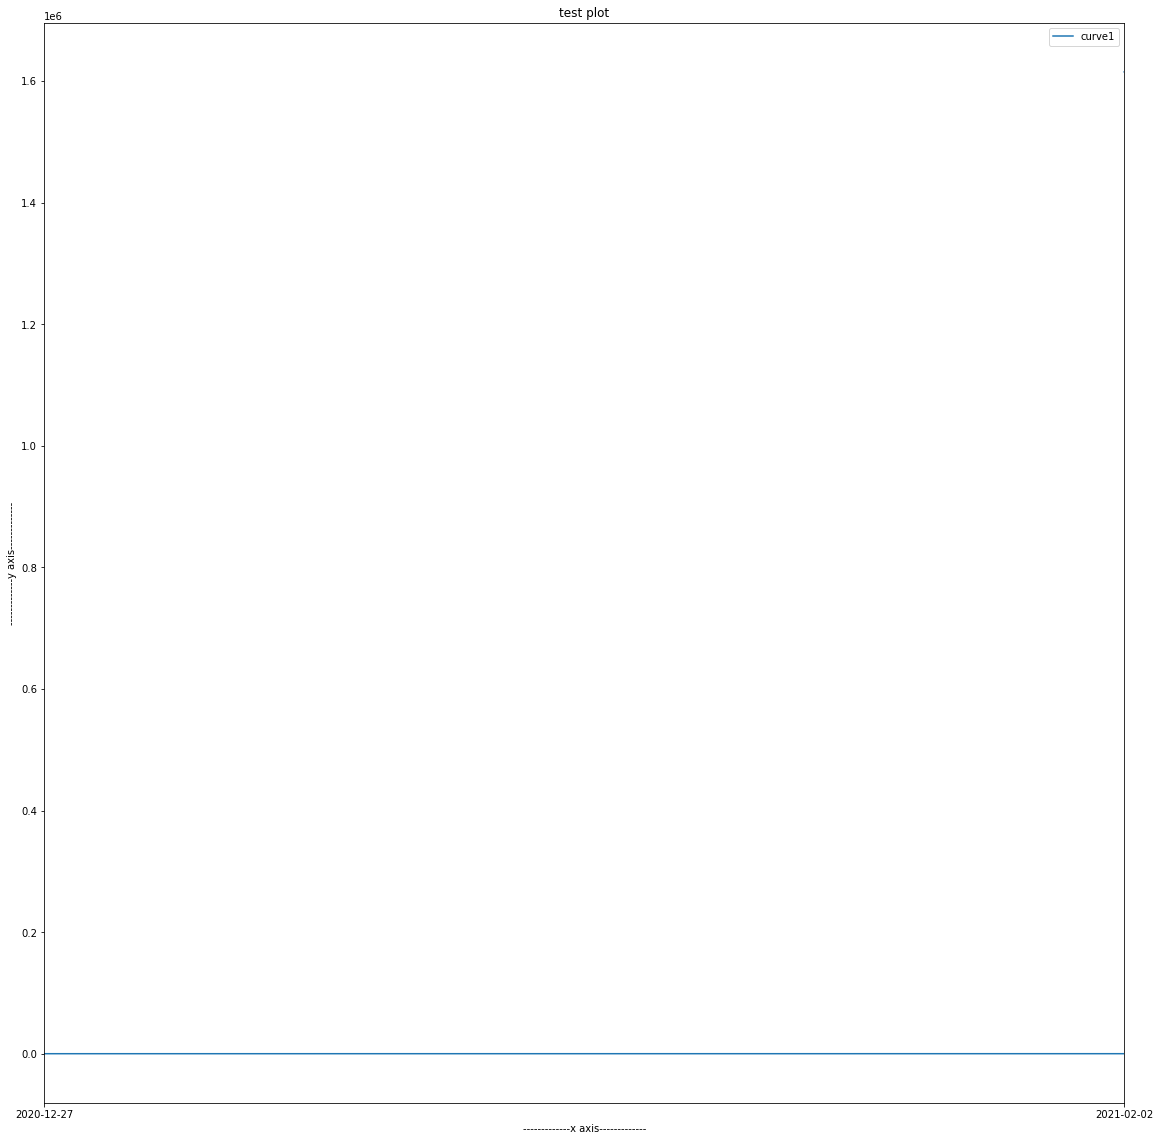

In [8]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])

ax.set_xlim(x[0], x[-1])
ax.set_title('test plot')
ax.set_xlabel('-------------x axis-------------')
ax.set_ylabel('-------------y axis-------------')

plt.plot(x,y,label='curve1')

ax.legend()

thisFig = plt.gcf()
thisFig.set_size_inches(15,15)
plt.show()